# Exploring the navigation neural manifolds of rat HPC

**Authors**:
  * Author: steevelaquitaine@epfl.ch; laquitainesteeve@gmail.com.
  * Adapted from notebooks by Steffen Schneider, Jin H Lee, Mackenzie Mathis.  
  * Duration: 6 min

**Learning outcomes:**
  * know how to perform a <u>discovery-driven analysis</u> to <u>explore the neural manifolds</u> with `CEBRA-Time`.
  * know how to <u>save a trained model</u> for later re-use.

**Method:**
  * Students study the paper section on the task, describe its design and objectives.
  
**Readings:**

* Schneider, S., Lee, J. H., & Mathis, M. W. (2023). Learnable latent embeddings for joint behavioural and neural analysis. Nature, 617(7960), 360-368. See [Figure 2](https://cebra.ai/docs/cebra-figures/figures/Figure2.html) in Schneider, Lee, Mathis.

**Python prerequisites:**

* installing and importing `libraries`
* plotting with `matplotlib` library

## (5m) Setup

1. Install `Cebra` with Python's pip software package manager (requires internet connection).
2. Import `software packages` (requires internet connection)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install ipython-autotime # time track colab notebook cells
!pip install --pre 'cebra[datasets,demos]'
%load_ext autotime

In [ ]:
# import packages
import sys
import numpy as np
import matplotlib.pyplot as plt
import cebra.datasets
from cebra import CEBRA

time: 13.2 s (started: 2024-03-14 07:28:27 +00:00)


## (5s) Loading the dataset

- The data will be automatically downloaded into a `/data` folder.

In [ ]:
hippocampus_pos = cebra.datasets.init('rat-hippocampus-single-achilles')

100%|██████████| 10.0M/10.0M [00:01<00:00, 7.04MB/s]


Download complete. Dataset saved in 'data/rat_hippocampus/achilles.jl'
time: 3.62 s (started: 2024-03-14 07:28:44 +00:00)


## (20s) Discovery-driven analysis.

- We will compare CEBRA-Time (discovery-driven), as in the recommended [CEBRA workflow](https://cebra.ai/docs/usage.html#the-cebra-workflow).

- We use an output dimension set to 3; in the paper the authors used 3-64 on the hippocampus data (and found a consistent topology across these dimensions).

### (1s) Parametrize

* For a quick CPU run-time demo, you can drop `max_iterations` to 100-500; otherwise set to 5000.

In [ ]:
# set parameters
max_iterations = 100 #10000 #default is 5000.

# initialize model
cebra_time_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1.12,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

time: 978 µs (started: 2024-03-14 07:33:41 +00:00)


### (15s) Train the model

- Train a model that uses time without the behavior information.

- We train the model with <u>neural data only</u>.

- We can use CEBRA -Time mode by setting <u>conditional = 'time'</u>

- We save the model with the `.save` method.


In [ ]:
# train the model to the neural data
cebra_time_model.fit(hippocampus_pos.neural)

# save the model
cebra_time_model.save("cebra_time_model.pt")

pos: -0.6393 neg:  6.4024 total:  5.7631 temperature:  1.1200: 100%|██████████| 100/100 [00:15<00:00,  6.43it/s]

time: 18.2 s (started: 2024-03-14 07:36:56 +00:00)


### (1s) Get its neural manifold

- We load the trained model with the `.load` method.

In [ ]:
# load the trained model
cebra_time_model = cebra.CEBRA.load("cebra_time_model.pt")

# get its manifold
cebra_time = cebra_time_model.transform(hippocampus_pos.neural)

time: 154 ms (started: 2024-03-14 07:38:18 +00:00)


### (1s) Plot

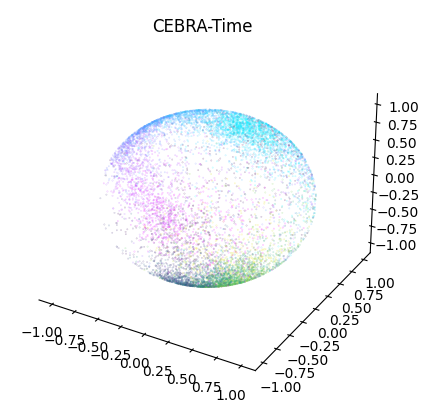

time: 896 ms (started: 2024-03-14 07:47:29 +00:00)


In [ ]:
%matplotlib inline

right = hippocampus_pos.continuous_index[:,1] == 1
left = hippocampus_pos.continuous_index[:,2] == 1

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(111, projection='3d')

for dir, cmap in zip([right, left], ["cool", "viridis"]):
    ax1 = cebra.plot_embedding(
        ax = ax1,
        embedding = cebra_time[dir,:],
        embedding_labels = hippocampus_pos.continuous_index[dir,0],
        title = 'CEBRA-Time',
        cmap = cmap
        )

plt.show()